<a href="https://colab.research.google.com/github/wcliao1962/2025_DL/blob/master/Keras_Mnist_MLP_h1000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 資料預處理

In [1]:
from tensorflow.keras import utils   # tf 2.0
import numpy as np
np.random.seed(10)

In [2]:
from tensorflow.keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
y_Train_OneHot = utils.to_categorical(y_train_label)
y_Test_OneHot = utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
model = Sequential()

In [8]:
#將「輸入層」與「隱藏層」加入模型

In [9]:
model.add(Dense(units=1000,
                input_dim=784,
                kernel_initializer='normal',
                activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
#將「輸出層」加入模型

In [11]:
model.add(Dense(units=10,
                kernel_initializer='normal',
                activation='softmax'))

In [12]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1000)                │         785,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          10,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 795,010 (3.03 MB)

 Trainable params: 795,010 (3.03 MB)

 Non-trainable params: 0 (0.00 B)

None


# 訓練模型

In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [14]:
train_history=model.fit(x=x_Train_normalize,
                        y=y_Train_OneHot,validation_split=0.2,
                        epochs=10, batch_size=200,verbose=2)

Epoch 1/10
240/240 - 10s - 40ms/step - accuracy: 0.9150 - loss: 0.2935 - val_accuracy: 0.9556 - val_loss: 0.1579
Epoch 2/10
240/240 - 8s - 35ms/step - accuracy: 0.9665 - loss: 0.1172 - val_accuracy: 0.9668 - val_loss: 0.1093
Epoch 3/10
240/240 - 6s - 25ms/step - accuracy: 0.9789 - loss: 0.0740 - val_accuracy: 0.9719 - val_loss: 0.0925
Epoch 4/10
240/240 - 10s - 43ms/step - accuracy: 0.9860 - loss: 0.0497 - val_accuracy: 0.9727 - val_loss: 0.0856
Epoch 5/10
240/240 - 9s - 39ms/step - accuracy: 0.9908 - loss: 0.0354 - val_accuracy: 0.9753 - val_loss: 0.0803
Epoch 6/10
240/240 - 6s - 26ms/step - accuracy: 0.9934 - loss: 0.0255 - val_accuracy: 0.9764 - val_loss: 0.0783
Epoch 7/10
240/240 - 5s - 21ms/step - accuracy: 0.9959 - loss: 0.0183 - val_accuracy: 0.9770 - val_loss: 0.0739
Epoch 8/10
240/240 - 6s - 26ms/step - accuracy: 0.9973 - loss: 0.0131 - val_accuracy: 0.9766 - val_loss: 0.0811
Epoch 9/10
240/240 - 5s - 21ms/step - accuracy: 0.9983 - loss: 0.0101 - val_accuracy: 0.9808 - val_los

# 以圖形顯示訓練過程

In [15]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [16]:
train_history

# **過度擬合(overfitting)**

* 當訓練資料的準確率比驗證資料的準確率高，且差距越來越大，神經網路與訓練資料有**過度擬合(overfitting)**問題。
* **過度擬合(overfitting)**就像考試，題庫做得非常熟練，考題庫題目分數非常高，考題庫外的題目就不會做，分數變低，學習者學習過度侷限題庫範圍。

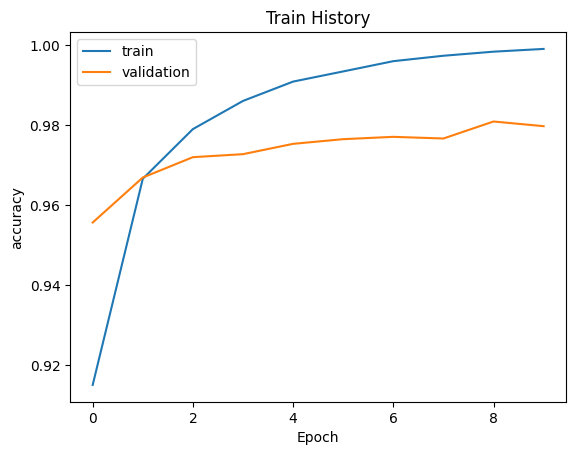

In [17]:
show_train_history(train_history,'accuracy','val_accuracy')

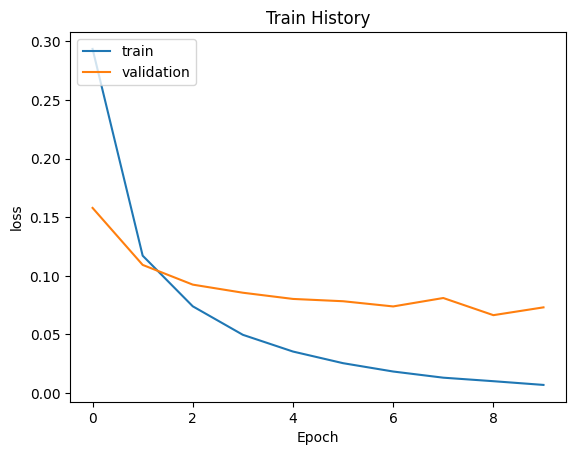

In [18]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [19]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9786 - loss: 0.0744

accuracy= 0.9811000227928162


# 進行預測

In [20]:
prediction=model.predict(x_Test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [21]:
prediction

array([[0.        , 0.        , 0.        , ..., 0.99999994, 0.        ,
        0.        ],
       [0.        , 0.        , 0.99999994, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.99999994, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [22]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10)

        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

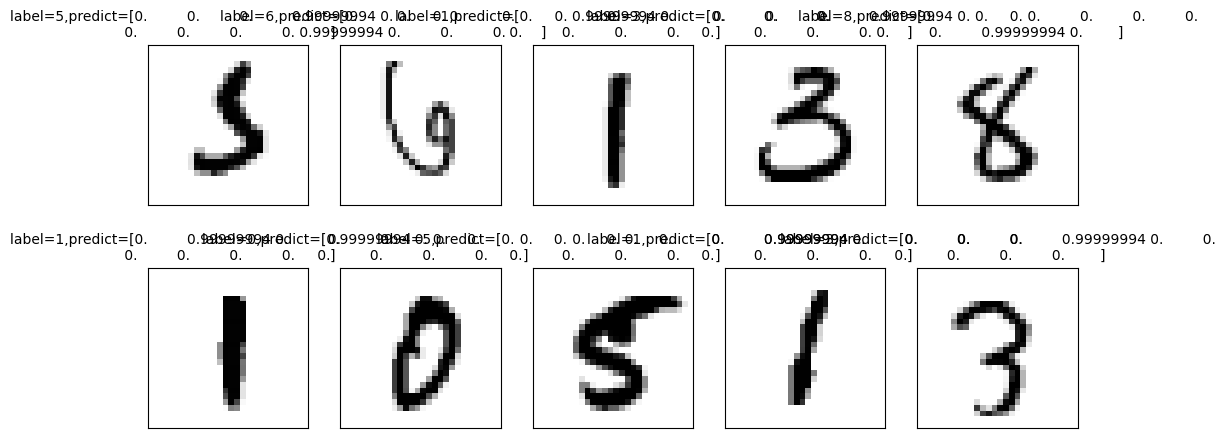

In [23]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=340)

# confusion matrix

In [25]:
import pandas as pd
# pd.crosstab(y_test_label,prediction,rownames=['label'],colnames=['predict'])
predicted_labels = np.argmax(prediction, axis=1)

# Now use predicted_labels in crosstab
pd.crosstab(y_test_label, predicted_labels, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,973,1,1,0,1,0,1,1,2,0
1,0,1125,4,0,0,0,2,1,3,0
2,4,2,1008,3,1,0,2,8,4,0
3,1,0,1,999,0,2,0,3,2,2
4,2,0,5,1,960,0,1,3,1,9
5,3,0,0,12,1,861,4,2,5,4
6,5,3,1,1,3,3,942,0,0,0
7,1,4,4,2,0,0,0,1014,1,2
8,5,0,4,13,2,1,2,3,942,2


In [27]:
df = pd.DataFrame({'label':y_test_label, 'predict':predicted_labels})
df[:2]

,label,predict
0,7,7
1,2,2


In [28]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
1670,5,3
2035,5,3
2597,5,3
2810,5,3
3902,5,3
4300,5,3
4360,5,3


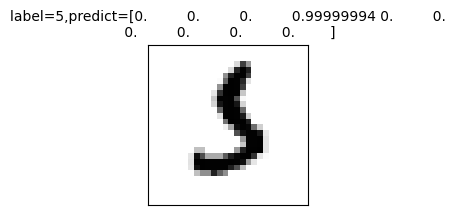

In [29]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=340,num=1)

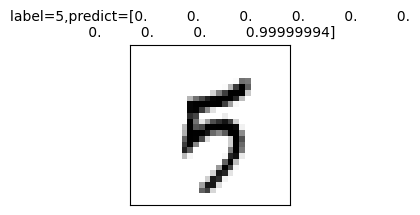

In [30]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1289,num=1)